In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npy
import seaborn as sb

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month

# Pantallazo general a los eventos
Aquí intentaré sacar conclusiones generales de cómo se comportan los eventos. Cuáles son los más frecuentes, los menos y y por qué.

In [3]:
data.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
eventos_mas_populares = data.event.value_counts()
eventos_mas_populares

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

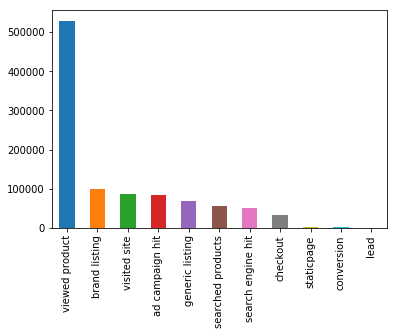

In [8]:
eventos_mas_populares.plot(kind = 'bar')

## Quiero saber los eventos más frecuentes segun pais/region/ciudad

In [23]:
eventos_mas_populares_por_pais = data.groupby('country')['event'].value_counts()
eventos_mas_populares_por_pais

country             event       
Algeria             visited site        1
Angola              visited site        2
Argentina           visited site       94
Bangladesh          visited site        4
Belize              visited site        1
Brazil              visited site    84308
Canada              visited site       35
Cape Verde          visited site        1
China               visited site        1
Colombia            visited site        4
Denmark             visited site        1
Dominican Republic  visited site        6
France              visited site       13
French Guiana       visited site        8
Germany             visited site        5
Guadeloupe          visited site        6
India               visited site        2
Ireland             visited site        1
Israel              visited site        1
Italy               visited site        7
Japan               visited site       11
Mexico              visited site        1
Morocco             visited site        2
M

El único evento en dónde se involucra el campo 'country' es 'visited site', por lo que sólo conozco el pais mediante el cual las personas visitan el sitio.

Quiero saber si ocurre lo mismo con el campo 'city' y con el campo 'region'

In [25]:
eventos_mas_populares_por_city = data.groupby('city')['event'].value_counts()
eventos_mas_populares_por_city

city                    event       
Abadiania               visited site      2
Abaete                  visited site      5
Abaetetuba              visited site      4
Abrantes                visited site      2
Abreu e Lima            visited site     35
Acailandia              visited site     42
Acajutiba               visited site      1
Acarau                  visited site     20
Acegua                  visited site      1
Acu                     visited site      2
Adamantina              visited site      6
Adolfo                  visited site      1
Afogados da Ingazeira   visited site     46
Afonso Claudio          visited site      6
Agrestina               visited site      3
Agronomica              visited site      1
Agua Boa                visited site      4
Agua Branca             visited site      4
Agua Doce               visited site      1
Aguai                   visited site      7
Aguas Belas             visited site     10
Aguas Lindas            visited site   

In [27]:
eventos_mas_populares_por_region = data.groupby('region')['event'].value_counts()
eventos_mas_populares_por_region

region                      event       
Acre                        visited site       96
Aichi                       visited site       11
Alagoas                     visited site      751
Amapa                       visited site      148
Amazonas                    visited site      600
Arkansas                    visited site        1
Asuncion                    visited site        2
Bahia                       visited site     5737
Basel-City                  visited site        3
British Columbia            visited site        6
Buenos Aires                visited site        5
Buenos Aires F.D.           visited site       76
California                  visited site      199
Castelo Branco              visited site        1
Ceara                       visited site     2829
Cidade de Maputo            visited site        8
Colorado                    visited site       10
Connecticut                 visited site       11
Cordoba                     visited site        2
Delaware 

### Conclusiones
Los campos 'country', 'region' y 'city' solo están activos cuando el evento es 'visited site'.
Intentaré determinar qué ciudades, regiones y países son las que generan más visitas.

Las visitas más relevantes provienen de brasil, estados unidos y 'unknown'. Despreciaré el resto de los países ya que no aportan información sustancial al análisis.

### Cantidad de visitas por ciudad de Brasil

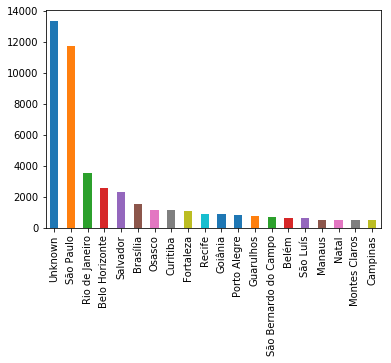

In [57]:
eventos_mas_visitados_en_brasil = data[data['country'] == 'Brazil']
ciudades = eventos_mas_visitados_en_brasil['city'].value_counts()
ciudades.head(20).plot(kind = 'bar')

### Cantidad de visitas por mes del 2018

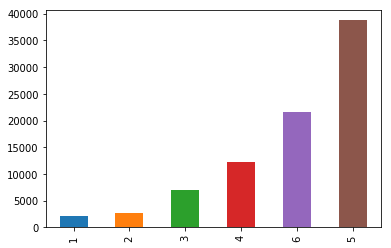

In [66]:
eventos_mas_populares_por_mes = eventos_mas_visitados_en_brasil['mes'].value_counts()
eventos_mas_populares_por_mes.sort_values().plot(kind = 'bar')

La mayor cantidad de datos proviene de localizaciones desconocidas, sin embargo tenemos una fuerte presencia en **Sao Paulo** seguido de **Rio de Janeiro**